# Desired output

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\sadhana reddy\\Desktop\\Projects\\Big mart')

### Below is the Data Dictionary for the given data

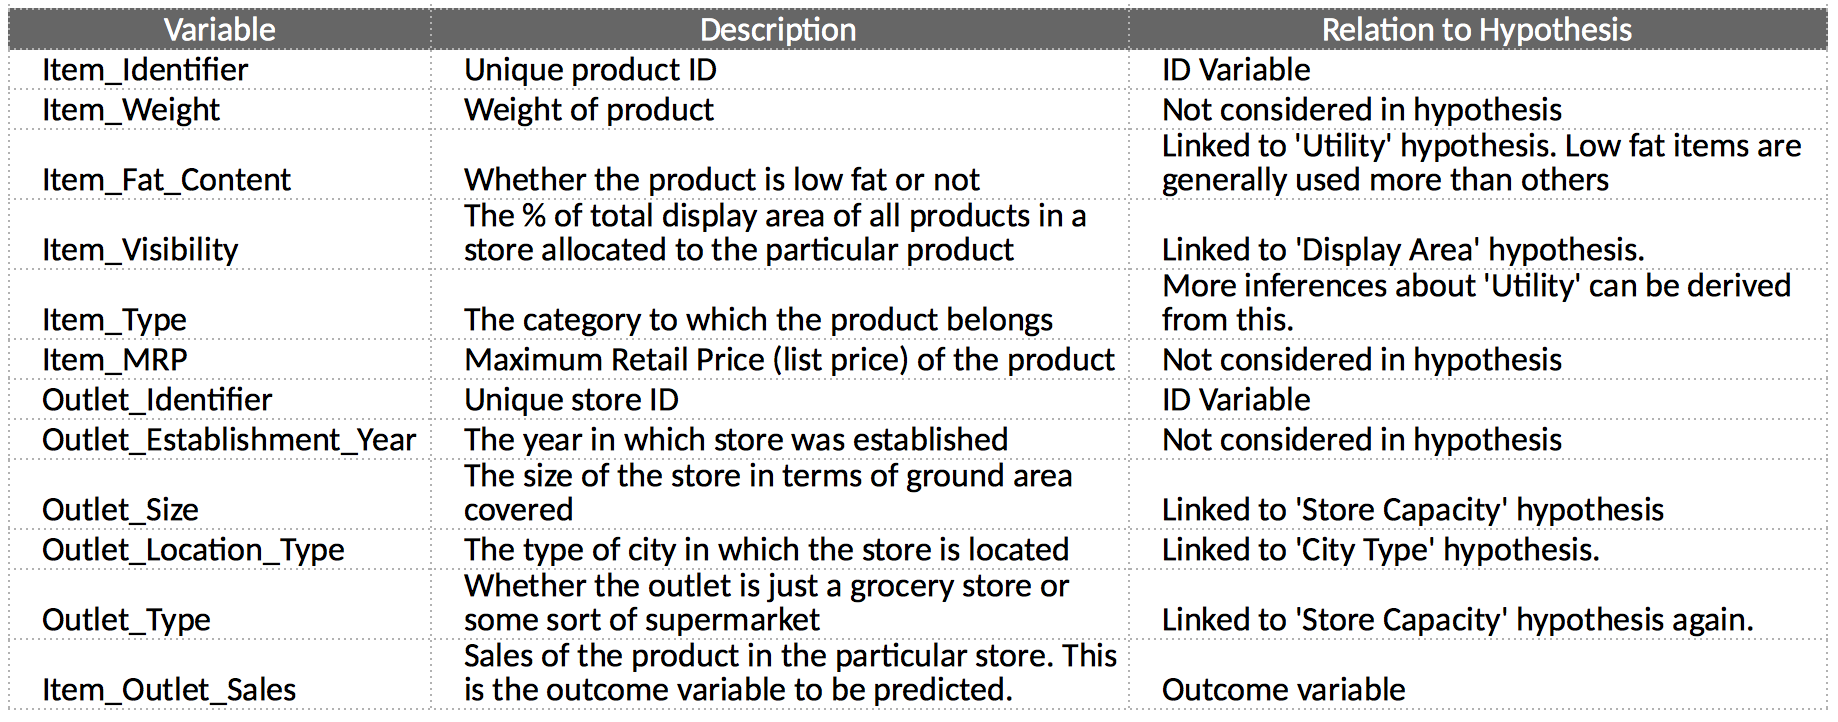

In [3]:
from IPython.display import Image
Image(filename ='data-dictionary.png',width= 700, height= 700 )

### As there are two different categories that could affect sales, considering and analyzing possible hypothesis for predicting sales on attributes corresponding to ITEM level and STORE level.

#### ITEM LEVEL:
1. Items with higher visibilities contribute to significant to the store sales
2. Understand whether Low fat items are sold more or less 

#### STORE LEVEL:
1. The stores located in large cities have higher sales  owing to higher income of population in general.
2. The large stores have higher sales as they have wide range of items.

## Data Pre-Processing

In [4]:
import pandas as pd
import numpy as np
mart_train = pd.read_csv('Train.csv')
mart_test = pd.read_csv('Test.csv')

In [5]:
mart_data = pd.concat([mart_train, mart_test],ignore_index = True, axis = 0)

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
mart_data.shape
mart_train.shape
mart_test.shape

(5681, 11)

In [7]:
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
mart_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
mart_data.apply(lambda x : sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

We could see that there are items without Weight and Few outlets with their size missing,
1. let's explore further to understand if there is any relation between item_type and item_weight. 
2. Similarly, for Outlet_size can be obtained from Outlet_Type and Location_Type. 
3. Item_sales field with NULL values could be the test data, exploring further to understand and impute the missing values.

In [10]:
#First confirming Null values of Item_Sales
mart_train.apply(lambda x : sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As the Item_Outlet_Sales has Zero NULL Values in Train data..no need of any imputation for this field in general.
Let's look more into data to understand on how the Item_type, Item_weight, Outlet_size and outlet_location_type fields are related and if the missing values can be imputed.

In [11]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
# Looking at how many Levels exist in Categorical variables and their Significance.

In [13]:
mart_data.apply(lambda x : len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
dtype: int64

In [14]:
mart_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

From the above categories, we can see that they are mislabelled, so Changing 
#### 'low fat', 'LF' to 'Low Fat' and 'reg' to 'Regular'

In [15]:
mart_data['Item_Fat_Content'] = mart_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

In [16]:
mart_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

Now, looking into next categorical variable Item_Type 

From the above we can observe that minimum of Item_visibility is ZERO which is technically incorrect as any item's visibility cannot be zero which is on shelf and up for sale.

In [17]:
mart_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

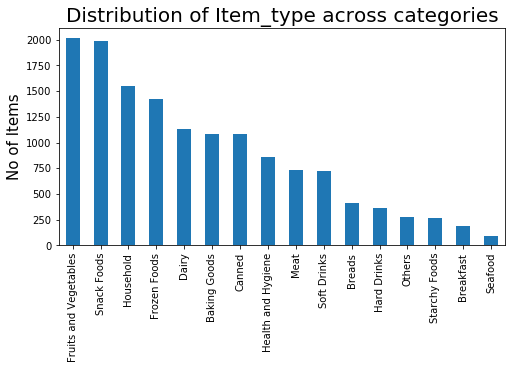

In [18]:
# Looking at the distribution of data
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (8,4))
mart_data['Item_Type'].value_counts().plot('bar')
plt.title('Distribution of Item_type across categories', fontsize = 20)
plt.ylabel('No of Items', fontsize = 15)
plt.show();

In [19]:
def substring(ItemId):
    Id = ItemId[:2]
    return(Id)
mart_data.ID = mart_data.Item_Identifier.apply(substring)

In [20]:
mart_data.ID.unique()

array(['FD', 'DR', 'NC'], dtype=object)

From the above, we can see that item_Identifier has 3 categories corresponding to various Item_Type. So, clubbing Item_type's into three categories

"Food, Drink, Non-Consummable"

In [21]:
# finding the Mappings between Item Id and Type
mart_data.Item_Type[mart_data.ID == 'FD'].unique()

array(['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods',
       'Snack Foods', 'Frozen Foods', 'Breakfast', 'Canned', 'Breads',
       'Starchy Foods', 'Seafood'], dtype=object)

In [22]:
mart_data.Item_Type[mart_data.ID == 'DR'].unique()

array(['Soft Drinks', 'Hard Drinks', 'Dairy'], dtype=object)

In [23]:
mart_data.Item_Type[mart_data.ID == 'NC'].unique()

array(['Household', 'Health and Hygiene', 'Others'], dtype=object)

In [24]:
mart_data.Item_Type = mart_data.Item_Type.replace(to_replace = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods',
       'Snack Foods', 'Frozen Foods', 'Breakfast', 'Canned', 'Breads',
       'Starchy Foods', 'Seafood','Soft Drinks', 'Hard Drinks', 'Dairy','Household', 'Health and Hygiene', 'Others'],
                            value = ['FD','FD','FD','FD','FD','FD','FD','FD','FD','FD','FD','DR','DR','DR','NC','NC','NC'])

In [25]:
mart_data.Item_Type = mart_data.Item_Type.replace(to_replace =['FD','DR','NC'] , value = ['Food','Drinks','Non-Consummable'])

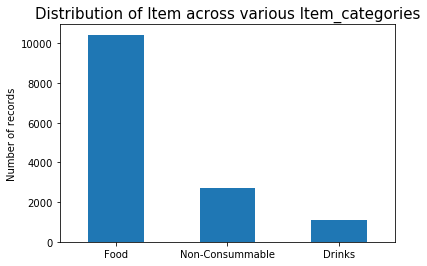

In [26]:
# Visualizing the distribution of data after the change
mart_data.Item_Type.value_counts().plot('bar')
plt.title('Distribution of Item across various Item_categories', fontsize = 15)
plt.ylabel('Number of records')
plt.xticks(rotation = 0)
plt.show();

### Now moving on to variables pertaining to Outlet 

In [27]:
mart_data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [28]:
mart_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [29]:
mart_data.Outlet_Type[mart_data['Outlet_Size'].isnull()].count()
mart_data.Outlet_Type[mart_data['Outlet_Size'].isnull()].unique()

4016

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

From the above, we can see that for records with outlet_size missing they are mapped to outlet_type as either 'Grocery Store' or 'Supermarket Type1'

Check to see if there is a one to one mapping between outlet_type and outlet_size

In [30]:
mart_data.Outlet_Size[mart_data.Outlet_Type == 'Grocery Store'].unique()

array([nan, 'Small'], dtype=object)

In [31]:
# Impute missing values corresponding to Outlet_Type as Grocery Store as "SMALL"
mart_data[mart_data.Outlet_Type == 'Grocery Store']['Outlet_Size'] = 'Small'
mart_data.Outlet_Size[mart_data.Outlet_Type == 'Grocery Store'].unique()

C:\Users\sadhana reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([nan, 'Small'], dtype=object)

In [32]:
mart_data[mart_data.Outlet_Size.isnull()]['Outlet_Identifier'].unique()
mart_data[mart_data.Outlet_Size.isnull()]['Outlet_Location_Type'].unique()
mart_data[mart_data.Outlet_Size.isnull()]['Outlet_Type'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

array(['Tier 3', 'Tier 2'], dtype=object)

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [33]:
mart_data.Outlet_Size[(mart_data.Outlet_Identifier == 'OUT045') | (mart_data.Outlet_Identifier == 'OUT017')].unique()
mart_data.Outlet_Size[mart_data.Outlet_Location_Type == 'Tier 2'].unique()
mart_data.Outlet_Size[mart_data.Outlet_Type == 'Supermarket Type1'].unique()

array([nan], dtype=object)

array([nan, 'Small'], dtype=object)

array(['Medium', 'High', nan, 'Small'], dtype=object)

In [34]:
mart_data.Outlet_Size[mart_data.Outlet_Location_Type == 'Tier 2'].value_counts()
mart_data.Outlet_Size[mart_data.Outlet_Location_Type == 'Tier 2'].isnull().sum()

Small    1550
Name: Outlet_Size, dtype: int64

3091

In [35]:
mart_data.Outlet_Size[mart_data.Outlet_Type == 'Supermarket Type1'].value_counts()

Small     3100
High      1553
Medium    1550
Name: Outlet_Size, dtype: int64

In [36]:
mart_data['Outlet_Size'].isnull().sum()

4016

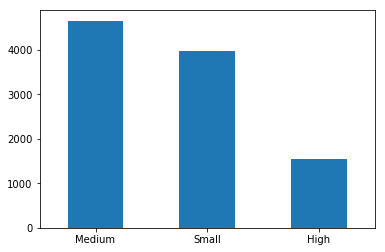

In [37]:
#looking at the distribution of Outlet_size across records
mart_data.Outlet_Size.value_counts().plot('bar')
plt.xticks(rotation = 0)
plt.show();

Since above missing values of Outlet_Type there are 3000+ records with missing data but looking at other columns it couldn't be pinpointed as to what records these missing values may depend on..exploring further with total sales 

In [38]:
mart_data.pivot_table(index= 'Outlet_Type',values='Item_Outlet_Sales',aggfunc='mean')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [39]:
#mart_data.Outlet_Size.isnull().sum()
mart_train[mart_train.Outlet_Size.isnull()]['Item_Outlet_Sales'].mean()

1822.6269474688818

In [40]:
mart_data.Outlet_Size[(mart_data.Outlet_Location_Type == 'Tier 2')].value_counts()
len(mart_data.Outlet_Size[(mart_data.Outlet_Location_Type == 'Tier 2')])

Small    1550
Name: Outlet_Size, dtype: int64

4641

As all of the locations come under Tier2 Location types, imputing the missing values to 'Small'

In [41]:
mart_data.Outlet_Size[mart_data.Outlet_Location_Type == 'Tier 2'] = 'Small'
print('Number of missing values after impuation: ',mart_data.Outlet_Size[mart_data.Outlet_Location_Type == 'Tier 2'].isnull().sum())

Number of missing values after impuation:  0


C:\Users\sadhana reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
mart_data.Outlet_Location_Type[mart_data.Outlet_Size.isnull()].unique()
mart_data.Outlet_Size[mart_data.Outlet_Location_Type == 'Tier 3'].value_counts()
# Imputing missing values to medium outlet_size
mart_data.Outlet_Size[mart_data.Outlet_Size.isnull()] = 'Medium'

array(['Tier 3'], dtype=object)

Medium    3105
High      1553
Name: Outlet_Size, dtype: int64

C:\Users\sadhana reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [43]:
mart_data.apply(lambda x : sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

Now, the imputation is to be performed for Item_weight, let's check the correlation between Weight and sales value.

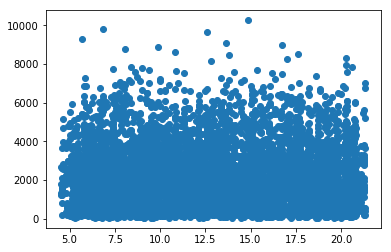

In [44]:
plt.scatter(x = 'Item_Weight',y = 'Item_Outlet_Sales', data = mart_data)
plt.show();

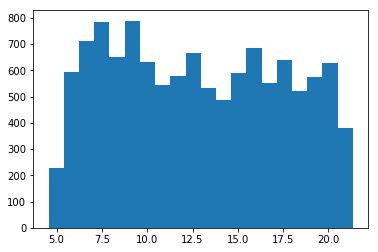

In [45]:
plt.hist(x = mart_data['Item_Weight'].dropna(),data = mart_data,bins = 20)
plt.show();

In [46]:
mart_data['Item_Weight'].describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

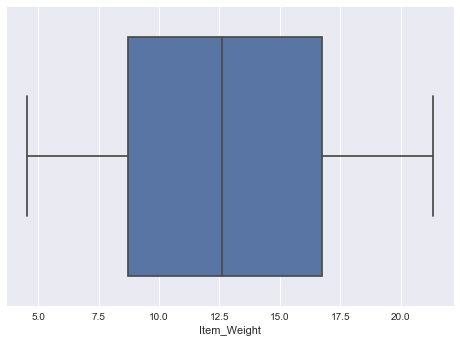

In [47]:
import seaborn as sns
sns.boxplot(x = 'Item_Weight', data = mart_data)

In [48]:
Item_weight_group = mart_data.groupby('Item_Identifier')[['Item_Identifier','Item_Weight']].mean()
Item_weight_group.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [49]:
mart_data['Item_Weight'] = mart_data.groupby('Item_Identifier')['Item_Weight'].transform('mean')

In [50]:
mart_data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

## As the Data cleaning process, let us perform feature engineering.Understand more on if the fields are required and what part of record values would make sense.

In [51]:
mart_data.loc[mart_data.Item_Type == 'Non-Consummable','Item_Fat_Content'] = 'Non-Edible'

In [52]:
mart_data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Adjusting Item Visibility for Items with zero visibility

Modifying items with zero visibility to minimum value corresponding to their item_identifier

In [53]:
print('Number of rows with Zero Visibility: ',mart_data[mart_data['Item_Visibility'] == 0]['Item_Identifier'].count())

Number of rows with Zero Visibility:  879


Finding minimum visibility for all ID's having Zero visibility

In [55]:
#Determine average visibility of a product
visibility_avg = mart_data.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg.head()
def visibility(x):
    if (visibility_avg.index == x).any():
        return(visibility_avg.loc[x,'Item_Visibility'])
    else:
        return(0)

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [56]:
mart_data.loc[mart_data.Item_Visibility == 0,'Item_Visibility'] = mart_data.loc[mart_data.Item_Visibility == 0,
                                                                                'Item_Identifier'].apply(lambda x: visibility(x))


In [57]:
mart_data[mart_data['Item_Visibility'] == 0].count()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

## Now that the mart_data is completely cleaned, let's explore Target variable, create train, validation sets, Feature scale if required, create dummy variables, choose relevant models and evaluate them

### Converting object types to Categorical Variables

In [58]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [59]:
mart_data['Item_Fat_Content'] = mart_data['Item_Fat_Content'].astype('category')
mart_data['Item_Type'] = mart_data['Item_Type'].astype('category')
mart_data['Outlet_Location_Type'] = mart_data['Outlet_Location_Type'].astype('category')
mart_data['Outlet_Size'] = mart_data['Outlet_Size'].astype('category')
mart_data['Outlet_Type'] = mart_data['Outlet_Type'].astype('category')

### Distribution of Target Variable "Item_Outlet_Sales"

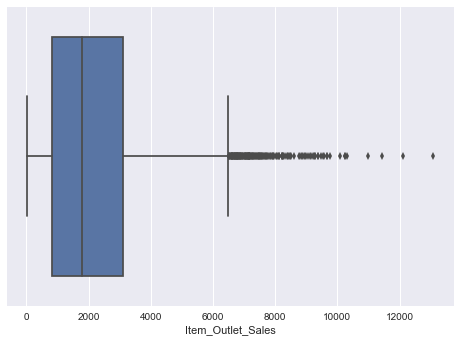

In [60]:
sns.boxplot('Item_Outlet_Sales',data = mart_data)

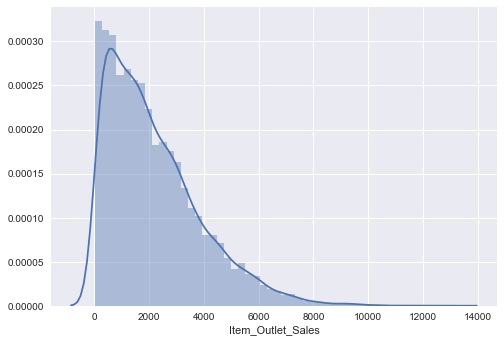

In [61]:
sns.distplot(mart_train['Item_Outlet_Sales'])
plt.show();

We could see that the sales are positively skewed which could be pretty much expected as there would be fewer products of higher cost

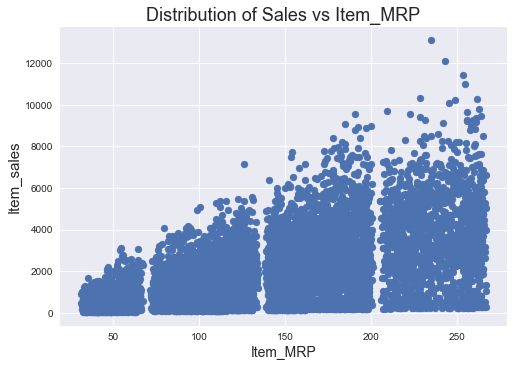

In [62]:
# Distribution of Item_MRP andd their sales
plt.scatter(x = 'Item_MRP', y = 'Item_Outlet_Sales',data = mart_data)
plt.title('Distribution of Sales vs Item_MRP',fontsize = 18)
plt.xlabel('Item_MRP',fontsize = 14)
plt.ylabel('Item_sales',fontsize = 15)
plt.show();

Let's look at Pearson Correlation for Item_Outlet_Sales with respect to various other continuous variables

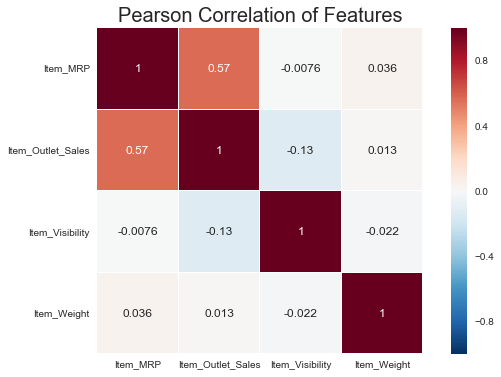

In [63]:
plt.figure(figsize=(10,6))
plt.title('Pearson Correlation of Features', y = 1, size = 20)
sns.heatmap(mart_data.loc[:,mart_data.dtypes == float].corr(),linewidths=0.1,vmax=1.0,square= True,
           cmap = plt.cm.RdBu_r, linecolor = 'white', annot = True)
plt.xticks(rotation = 0)
plt.show();

### From above heatmap and Scatter plot it could be observed that only Item_MRP and Item_Sales are correlated

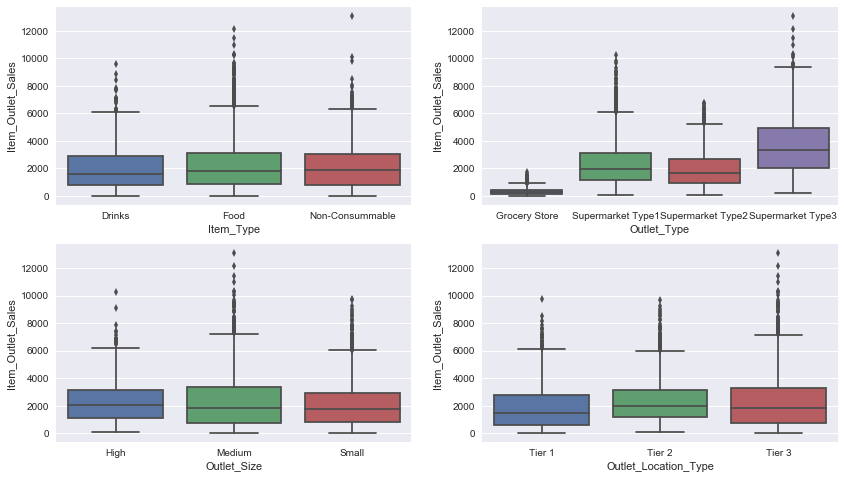

In [64]:
#Looking at the distribution of sales across categories
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.boxplot(x = 'Item_Type' , y = 'Item_Outlet_Sales', data = mart_data)
plt.subplot(222)
sns.boxplot(x = 'Outlet_Type' , y = 'Item_Outlet_Sales', data = mart_data)
plt.subplot(223)
sns.boxplot(x = 'Outlet_Size' , y = 'Item_Outlet_Sales', data = mart_data)
plt.subplot(224)
sns.boxplot(x = 'Outlet_Location_Type' , y = 'Item_Outlet_Sales', data = mart_data)
plt.show();

### Except in case of Outlet_Type, in rest of all cases Item_Outlet_sales are fairly equally distributed across Categories

## Creating Independent variables and Target Variable

## Creating Dummy variables using One-Hot encoding Technique

## Spliiting into Train, validation, tests sets using K-Fold Validation Technique.

## Understanding and Finalizing Various Modelling Techniques that would be relevant for this Dataset.